# Final Group Project: Prediction of the Top 3 Winners of the upcoming Azerbaijan Grand Prix
#### Group Member: Catherine Jin, Oliver Zhao, Conny Zhou
#### Section: QTM 151, Section 3

I.Introduction

    -Background: What is F1?

    Formula One, also known as F1, is the highest class of single-seater auto racing that is sanctioned by the Fédération Internationale de l'Automobile (FIA). The F1 World Championship is the most prestigious and popular motorsport event in the world, featuring a series of races called Grands Prix that take place across the globe. F1 cars are the most technologically advanced and fastest racing cars in the world, capable of reaching speeds over 370 km/h (230 mph). The sport is known for its high levels of competition, drama, and excitement, with drivers and teams competing for the World Championship title each season. F1 is watched by millions of fans around the world and has a rich history dating back to the 1950s.


In [19]:
##Lewis Hamilton
##Mclaren before 2013, Mercedez Bens after 2013
##Test
##zhaobo 6

In [20]:
#Import several libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px


In [21]:
## Read csv dataset
results = pd.read_csv("data_raw/results.csv")
qualifying = pd.read_csv("data_raw/qualifying.csv")

In [22]:
##Get Mr.Hamilton's results from results
res_ham = results.query("driverId == 1")
qua_ham = qualifying.query("driverId == 1")

In [23]:
res_ham

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
26,27,19,1,1,22,9,5,5,5,4.0,56,+46.548,5525103,53,3,1:35.462,209.033,1
56,57,20,1,1,22,3,13,13,13,0.0,56,\N,\N,25,19,1:35.520,203.969,11
68,69,21,1,1,22,5,3,3,3,6.0,66,+4.187,5903238,20,3,1:22.017,204.323,1
89,90,22,1,1,22,3,2,2,2,8.0,58,+3.779,5213230,31,2,1:26.529,222.085,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25744,25750,1092,1,131,44,6,5,5,5,10.0,28,+40.326,10944330,11,7,1:45.530,198.097,1
25761,25767,1093,1,131,44,3,2,2,2,18.0,56,+5.023,6136710,45,5,1:39.830,198.805,1
25781,25787,1094,1,131,44,3,2,2,2,18.0,71,+15.186,5931915,32,5,1:22.062,188.813,1
25801,25807,1095,1,131,44,2,2,2,2,18.0,71,+1.529,5915573,63,2,1:13.942,209.791,1


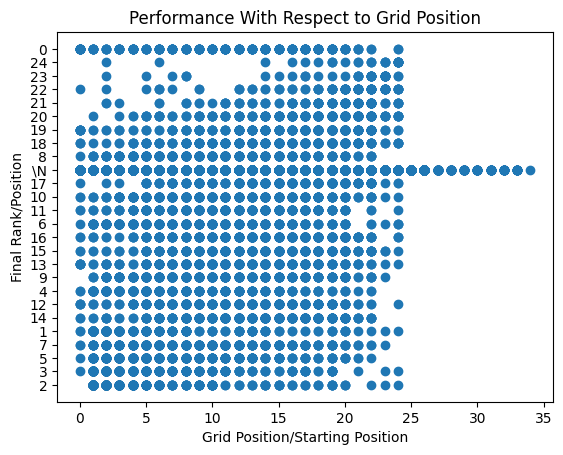

In [24]:
plt.scatter(x = results["grid"], y = results["rank"])
plt.xlabel("Grid Position/Starting Position")
plt.ylabel("Final Rank/Position")
plt.title("Performance With Respect to Grid Position")
plt.show()

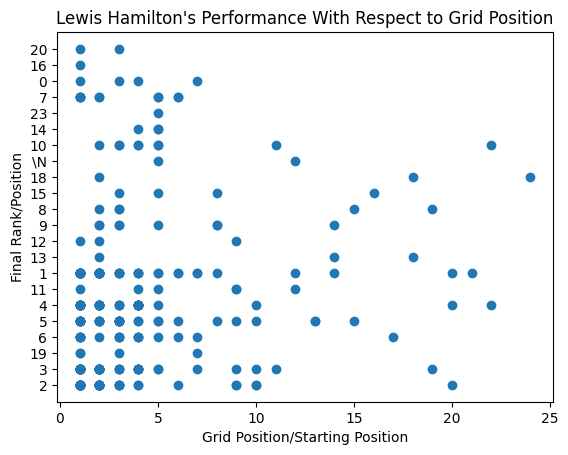

In [25]:
##Lewis Hamilton's Performance With Respect to Grid Position
plt.scatter(x = res_ham["grid"], y = res_ham["rank"])
plt.xlabel("Grid Position/Starting Position")
plt.ylabel("Final Rank/Position")
plt.title("Lewis Hamilton's Performance With Respect to Grid Position")
plt.show()

In [36]:
drivers = pd.read_csv("data_raw/drivers.csv")
results = pd.read_csv("data_raw/results.csv")
races = pd.read_csv("data_raw/races.csv")

In [27]:
## 20 Drivers in 2023 Season
drivers_2023 = drivers.query("(surname == 'Verstappen' and forename == 'Max') or \
                             (surname == 'Pérez' and forename == 'Sergio') or \
                             (surname == 'Alonso' and forename == 'Fernando') or \
                             (surname == 'Stroll' and forename == 'Lance') or \
                             (surname == 'Russell' and forename == 'George') or \
                             (surname == 'Hamilton' and forename == 'Lewis') or \
                             (surname == 'Leclerc' and forename == 'Charles') or \
                             (surname == 'Sainz' and forename == 'Carlos') or \
                             (surname == 'Piastri' and forename == 'Oscar') or \
                             (surname == 'Norris' and forename == 'Lando') or \
                             (surname == 'Ocon' and forename == 'Esteban') or \
                             (surname == 'Gasly' and forename == 'Pierre') or \
                             (surname == 'Hülkenberg' and forename == 'Nico') or \
                             (surname == 'Magnussen' and forename == 'Kevin') or \
                             (surname == 'Zhou' and forename == 'Guanyu') or \
                             (surname == 'Bottas' and forename == 'Valtteri') or \
                             (surname == 'de Vries' and forename == 'Nyck') or \
                             (surname == 'Tsunoda' and forename == 'Yuki') or \
                             (surname == 'Sargeant' and forename == 'Logan') or \
                             (surname == 'Albon' and forename == 'Alexander')")

In [38]:
##Predict the outcome in the forthcoming 4/30 Azerbaijan Grand Prix based on pervious performance
##Extract past competitions with the following commonality:
##Circuit ID: 73, Baku, Azerbaijan
##Driver ID: 20 drivers in 2023
series_drId = drivers_2023["driverId"]
vec_drId = np.array(series_drId.values)
results_Baku = (results[results['driverId'].isin(vec_drId)]
                .query("raceId == [976, 992, 1013, 1057, 1081]"))
results_Baku_mod = pd.merge(races, results_Baku, on='raceId')


In [40]:
results_Baku_mod['year_str'] = results_Baku_mod['year'].astype(str)

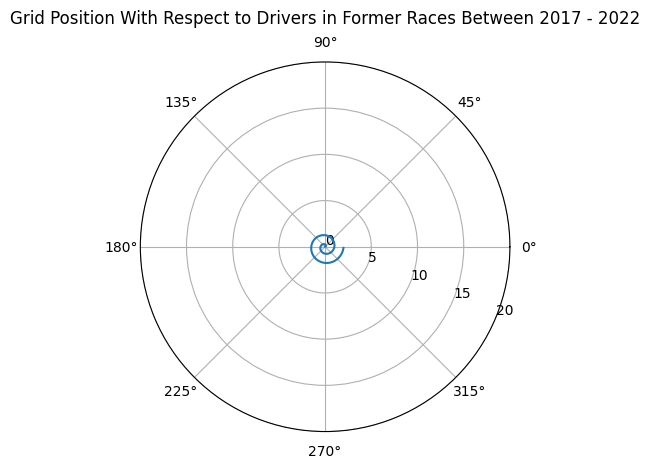

In [29]:
r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0, 5, 10, 15, 20])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("Grid Position With Respect to Drivers in Former Races Between 2017 - 2022", va='bottom')
plt.show()

In [42]:
fig = px.line_polar(results_Baku_mod ,r='positionOrder', theta= 'year_str', 
                    color = 'driverId', line_close=True, 
                    title='Polar seasonal plot',
                    width=600, height=500)
fig.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Library/Frameworks/Pyth

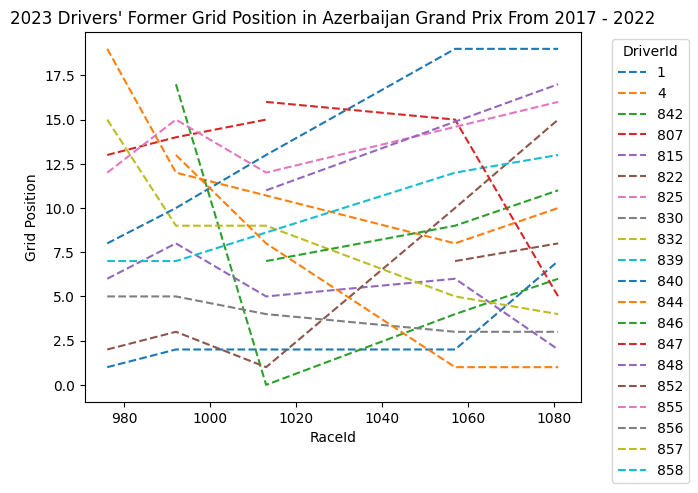

In [31]:
##Grid Positions For Each Driver
for driverId in series_drId:
    x = results_Baku.query(f"driverId == {driverId}")["raceId"]
    y = results_Baku.query(f"driverId == {driverId}")["grid"]
    plt.plot(x,y,linestyle = 'dashed')
    plt.xlabel("RaceId")
    plt.ylabel("Grid Position")
    plt.title("2023 Drivers' Former Grid Position in Azerbaijan Grand Prix From 2017 - 2022")

plt.legend(labels = vec_drId,
           title  = "DriverId",
           bbox_to_anchor=(1.05, 1))
plt.show()



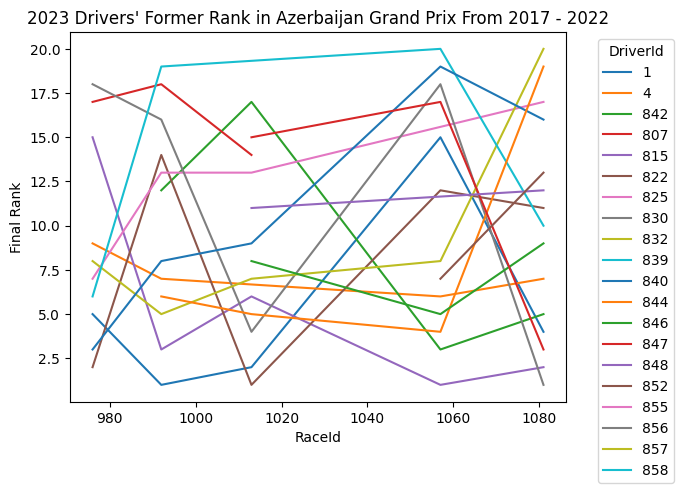

In [32]:
##Grid Positions For Each Driver
for ID in vec_drId:
    x = results_Baku.query(f"driverId == {ID}")["raceId"]
    y = results_Baku.query(f"driverId == {ID}")["positionOrder"]
    plt.plot(x,y)
    plt.xlabel("RaceId")
    plt.ylabel("Final Rank")
    plt.title("2023 Drivers' Former Rank in Azerbaijan Grand Prix From 2017 - 2022")

plt.legend(labels = vec_drId,
           title  = "DriverId",
           bbox_to_anchor=(1.05, 1))
plt.show()